<a href="https://colab.research.google.com/github/imchinmay/Python/blob/main/01_Basics/27_Exercise_Pandas_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - Pandas Basics

## Topics Covered

This exercise goes over:

* Filtering by specific rows
* Aggregate Functions
* Group by

## Question

Perform an exploratory analysis focusing on data jobs in each country. Look at the average yearly salary, job count, and salary range (minimum and maximum salaries).

### Load Data

First we'll load in the data.

In [34]:
# Install datasets Library (if not already installed)
# !pip install -U datasets

# Importing Libraries
import pandas as pd
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

### Create New DataFrame

Let's create a new DataFrame that filters the rows where the `job_country` is 'United States'. This is so we can only get data jobs in the US.

In [35]:
us_jobs = df[df['job_country'] == 'United States']
us_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


### Average Yearly Salary

Return the average yearly salary using `salary_year_avg` by the job title (`job_title_short`).

In [36]:
us_jobs.groupby('job_title_short')['salary_year_avg'].mean()

,salary_year_avg
job_title_short,
Business Analyst,96175.447397
Cloud Engineer,120090.900000
Data Analyst,94553.964924
Data Engineer,134226.676753
Data Scientist,139946.707204
Machine Learning Engineer,154240.382812
Senior Data Analyst,115729.129954
Senior Data Engineer,151448.023186
Senior Data Scientist,159330.432029


Instead of returning this in alphabetical order by country name. Let's order it by the highest to lowest using `sort_values()`.

In [37]:
us_jobs.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)

,salary_year_avg
job_title_short,
Senior Data Scientist,159330.432029
Machine Learning Engineer,154240.382812
Senior Data Engineer,151448.023186
Data Scientist,139946.707204
Software Engineer,137964.929588
Data Engineer,134226.676753
Cloud Engineer,120090.900000
Senior Data Analyst,115729.129954
Business Analyst,96175.447397


### Job Count

Count the total number of data analyst job postings for each job title to understand the job market size.

We're using `size()` to get a straightforward count of all postings per job title (including those will nulls in other columns but not the country column).

In [38]:
us_jobs.groupby('job_title_short').size().sort_values(ascending=False)

,0
job_title_short,
Data Analyst,67816
Data Scientist,58830
Data Engineer,35080
Senior Data Scientist,12946
Senior Data Analyst,11791
Senior Data Engineer,9289
Business Analyst,7382
Software Engineer,1814
Machine Learning Engineer,921


### Salary Range

Determine the minimum and maximum yearly salaries offered in each job title to assess the salary range and economic disparity.

We use `agg()` because we want to get both the `min` and `max` `salary_year_avg` by `job_title_short`.

In [39]:
us_jobs.groupby('job_title_short')['salary_year_avg'].agg(['median', 'min', 'max', 'count']).sort_values(by='median', ascending=False)


,median,min,max,count
job_title_short,,,,
Senior Data Scientist,155000.0,55000.0,475000.0,1241
Machine Learning Engineer,150000.0,44408.5,315000.0,128
Senior Data Engineer,150000.0,45000.0,375000.0,1058
Data Scientist,130000.0,30000.0,960000.0,4553
Software Engineer,130000.0,48982.0,375000.0,157
Data Engineer,125000.0,23496.0,525000.0,2915
Cloud Engineer,116100.0,42000.0,221844.0,20
Senior Data Analyst,110000.0,35360.0,425000.0,913
Business Analyst,90000.0,35000.0,387460.0,431


# My Work

In [40]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df.describe()

,salary_year_avg,salary_hour_avg
count,22003.000000,10662.000000
mean,123286.274072,47.016598
std,48312.449482,21.890738
min,15000.000000,8.000000
25%,90000.000000,27.500000
50%,115000.000000,45.980000
75%,150000.000000,61.159996
max,960000.000000,391.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [42]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

# Explore the data

In [43]:
df['job_country']

,job_country
0,United States
1,Mexico
2,Germany
3,United States
4,Sudan
...,...
785736,Singapore
785737,Germany
785738,Malaysia
785739,Sudan


In [44]:
df['job_country'].unique()

array(['United States', 'Mexico', 'Germany', 'Sudan', 'Romania',
       'Denmark', 'Switzerland', 'France', 'Brazil', 'United Kingdom',
       'India', 'Poland', 'Belgium', 'Russia', 'Serbia', 'Singapore',
       'Costa Rica', 'Ireland', 'Italy', 'Malaysia', 'Canada', 'Uruguay',
       'Namibia', 'Estonia', 'Israel', 'Hungary', 'Austria',
       'Philippines', 'Egypt', 'Australia', 'Chile', 'Spain',
       'Netherlands', 'South Africa', 'Colombia', 'Hong Kong', 'Kuwait',
       'Finland', 'Luxembourg', 'China', 'Puerto Rico', 'Sweden',
       'Saudi Arabia', 'Argentina', 'Turkey', 'Panama', 'Nigeria',
       'New Zealand', 'Ukraine', 'Jordan', 'United Arab Emirates',
       'Armenia', 'Pakistan', 'Lesotho', 'Mauritius', 'Portugal',
       'Bahrain', 'Taiwan', "Côte d'Ivoire", 'U.S. Virgin Islands',
       'Réunion', 'Kazakhstan', 'Lithuania', 'Moldova', 'Belarus',
       'Cyprus', 'Bulgaria', 'Honduras', 'Czechia', 'Peru', 'South Korea',
       'Malta', 'Indonesia', 'Tunisia', 'Latvia'

In [45]:
df['job_country'].value_counts().head(20)

,count
job_country,
United States,206292
India,51088
United Kingdom,40375
France,39922
Germany,27694
Spain,25100
Singapore,23696
Sudan,21781
Netherlands,20631


In [46]:
df['job_country'].isin(['India']).any()

np.True_

In [47]:
help(any)

Help on built-in function any in module builtins:

any(iterable, /)
    Return True if bool(x) is True for any x in the iterable.

    If the iterable is empty, return False.



In [48]:
us_data = df[df['job_country'] == "United States"]
us_data

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [49]:
in_data = df[df['job_country'] == "India"]
in_data

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'..."
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"['python', 'sql', 'aws', 'pyspark', 'docker', ...","{'async': ['jira'], 'cloud': ['aws'], 'librari..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"['excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']}"
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"['c#', 'sql']","{'programming': ['c#', 'sql']}"
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None


In [50]:
in_data.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,51088,582.000000,7.0
mean,2023-07-02 09:43:42.821445632,113602.182131,25.0
min,2023-01-01 00:28:47,32400.000000,25.0
25%,2023-03-27 08:22:10.249999872,79200.000000,25.0
50%,2023-07-05 07:14:01.500000,111175.000000,25.0
75%,2023-10-08 03:11:21,147500.000000,25.0
max,2023-12-31 23:06:01,650000.000000,25.0
std,NaN,44919.262828,0.0


In [51]:
in_data = in_data[in_data['salary_year_avg'].notna()]
us_data = us_data[us_data['salary_year_avg'].notna()]

In [52]:
us_data.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,15766,15766.000000,0.0
mean,2023-06-17 20:54:59.377901824,126134.487958,NaN
min,2023-01-01 00:02:56,23496.000000,NaN
25%,2023-03-21 16:22:17,90000.000000,NaN
50%,2023-06-17 07:00:43,119187.500000,NaN
75%,2023-09-01 17:57:56.750000128,150000.000000,NaN
max,2023-12-31 17:31:57,960000.000000,NaN
std,NaN,48881.042901,NaN


In [53]:
in_data.groupby('job_title_short')['salary_year_avg'].agg(['median', 'min', 'max', 'count','mean']).sort_values(by='mean', ascending=False)

,median,min,max,count,mean
job_title_short,,,,,
Senior Data Engineer,147500.0,35000.0,181765.0,57,132148.631579
Senior Data Scientist,149653.0,64800.0,170575.0,33,126035.787879
Data Engineer,147500.0,43200.0,249000.0,169,123312.390533
Data Scientist,114008.0,43200.0,204381.0,92,118203.690217
Machine Learning Engineer,79200.0,32500.0,267000.0,57,111372.570175
Senior Data Analyst,111175.0,64800.0,177283.0,27,105740.592593
Data Analyst,100500.0,32400.0,650000.0,94,99149.925532
Business Analyst,64800.0,43200.0,142025.0,8,82255.125000
Software Engineer,79200.0,44418.5,200000.0,45,78420.377778


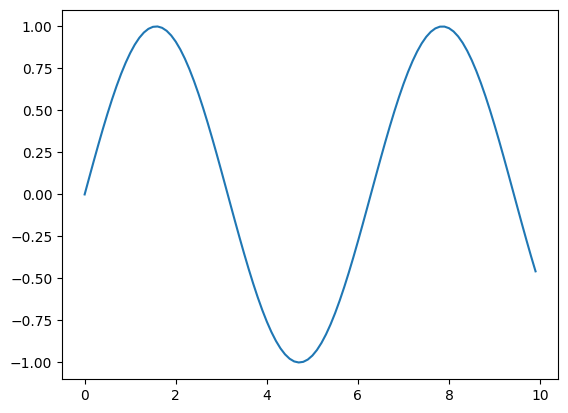

In [56]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,10,0.1)
y  = np.sin(x)

plt.plot(x,y)
plt.show()


In [70]:
month_counts = in_data.job_posted_date.dt.month.value_counts().sort_index(ascending=True)

In [71]:
month_counts

,count
job_posted_date,
1,73
2,58
3,68
4,45
5,53
6,80
7,63
8,45
9,12


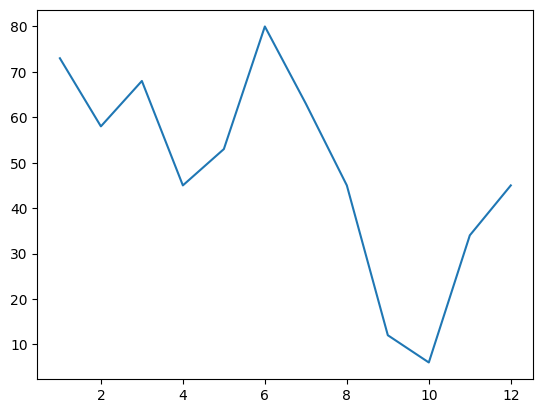

In [72]:
plt.plot(month_counts.index, month_counts)

In [76]:
in_data['job_posted_day_of_week'] = in_data['job_posted_date'].dt.day_name()
in_data.head()

/tmp/ipython-input-3948811387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_data['job_posted_day_of_week'] = in_data['job_posted_date'].dt.day_name()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_day_of_week
1209,Machine Learning Engineer,Computer Vision Developer (R&D),"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-18 13:12:30,False,False,India,year,79200.0,NaN,Bosch Group,"['python', 'opencv', 'tensorflow', 'pytorch', ...","{'libraries': ['opencv', 'tensorflow', 'pytorc...",Saturday
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,"['java', 't-sql', 'sql', 'azure', 'power bi', ...","{'analyst_tools': ['power bi', 'dax'], 'async'...",Tuesday
2785,Data Engineer,Staff Software Engineer - Data Engineering (Ja...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-26 13:13:28,False,False,India,year,147500.0,NaN,Zscaler,"['java', 'nosql', 'neo4j', 'redshift', 'aws', ...","{'analyst_tools': ['excel'], 'cloud': ['redshi...",Friday
3190,Senior Data Engineer,Senior Big Data DevOps & Deployment Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:21,False,False,India,year,79200.0,NaN,ServiceNow,"['sql', 'perl', 'bash', 'groovy', 'python', 's...","{'analyst_tools': ['tableau'], 'cloud': ['azur...",Friday
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"['python', 'r', 'c++', 'tensorflow', 'tableau']","{'analyst_tools': ['tableau'], 'libraries': ['...",Tuesday


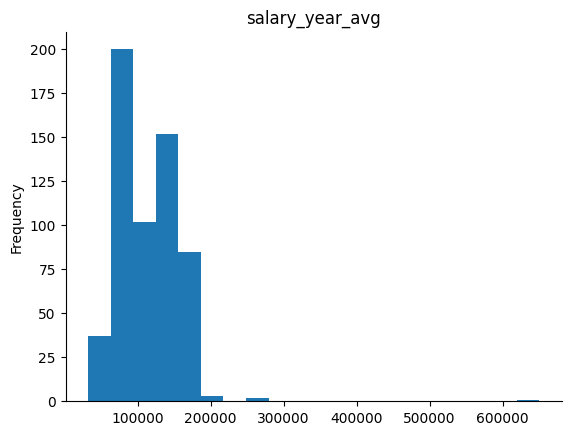

In [82]:
# @title salary_year_avg

from matplotlib import pyplot as plt
in_data['salary_year_avg'].plot(kind='hist', bins=20, title='salary_year_avg')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [79]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
in_data['job_posted_day_of_week'] = pd.Categorical(in_data['job_posted_day_of_week'], categories=days_order, ordered=True)
day_counts = in_data.job_posted_day_of_week.value_counts().sort_index(ascending=True)
day_counts

/tmp/ipython-input-1187744858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_data['job_posted_day_of_week'] = pd.Categorical(in_data['job_posted_day_of_week'], categories=days_order, ordered=True)


,count
job_posted_day_of_week,
Monday,87
Tuesday,126
Wednesday,95
Thursday,115
Friday,96
Saturday,49
Sunday,14


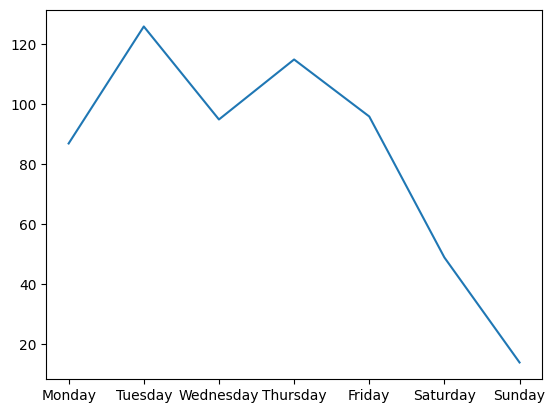

In [80]:
plt.plot(day_counts.index,day_counts)

In [83]:
in_data.job_title_short.value_counts()

,count
job_title_short,
Data Engineer,169
Data Analyst,94
Data Scientist,92
Machine Learning Engineer,57
Senior Data Engineer,57
Software Engineer,45
Senior Data Scientist,33
Senior Data Analyst,27
Business Analyst,8


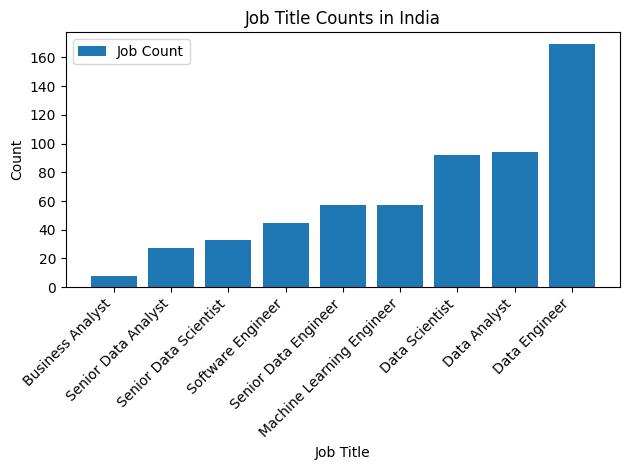

In [96]:
plt.bar(job_counts.index, job_counts, label='Job Count')
plt.title('Job Title Counts in India')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend() # Add a legend
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

<Axes: xlabel='job_posted_day_of_week', ylabel='salary_year_avg'>

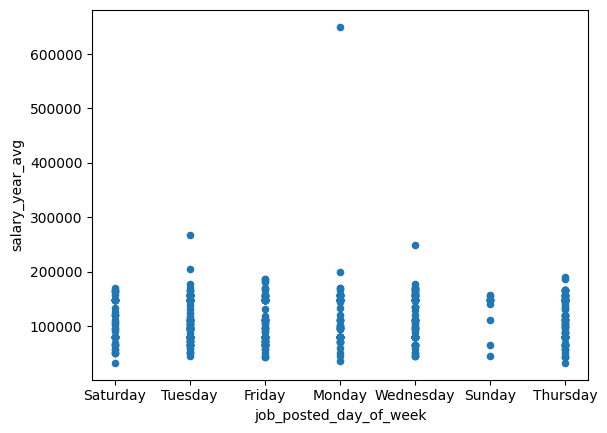

In [106]:
in_data.plot(x = 'job_posted_day_of_week', y = 'salary_year_avg', kind = 'scatter')

In [108]:
in_med_values = in_data.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False)
in_med_values

,salary_year_avg
job_title_short,
Senior Data Scientist,149653.0
Senior Data Engineer,147500.0
Data Engineer,147500.0
Data Scientist,114008.0
Senior Data Analyst,111175.0
Data Analyst,100500.0
Machine Learning Engineer,79200.0
Software Engineer,79200.0
Business Analyst,64800.0


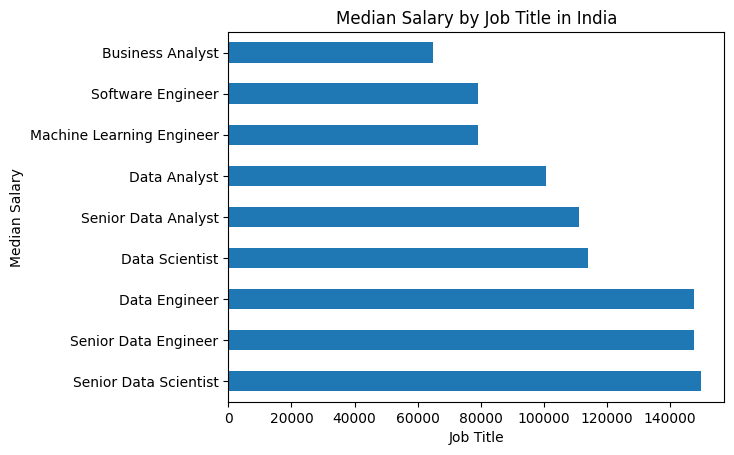

In [112]:
in_med_values.plot(kind='barh')
plt.xlabel('Job Title')
plt.ylabel('Median Salary')
plt.title('Median Salary by Job Title in India')
plt.show()